In [62]:
from  google.colab import drive  
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/econ4130
### save and load data using pickle
import pickle
def psave(dataframe, fname):
    with open('{}.pkl'.format(fname),'wb') as pickle_file:
        pickle.dump(dataframe,pickle_file)
        
def pload(fname):
  
  with open('{}.pkl'.format(fname),'rb') as pickle_file:
      dataframe=pickle.load(pickle_file)
      return dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/econ4130


In [63]:
SVR=pload('SVR_MSE_3')

In [64]:
SVRMSE=[SVR[0],SVR[1]]
SVRMSE

[{'10Y': 0.013622914409267634,
  '2Y': 0.0858699963080512,
  '30Y': 0.017673928822801537,
  '3M': 0.16941836480071934,
  '5Y': 0.01753546117470823},
 {'10Y': 0.007564890243061224,
  '2Y': 0.007284976388097189,
  '30Y': 0.032126585041795976,
  '3M': 0.030937543768286505,
  '5Y': 0.038247901971584855}]

In [65]:
RIDMSE=[pload('mse_ridge'),pload('mse_ridge1')]

In [66]:
RIDMSE

[{'10Y': 0.0058285116297086305,
  '2Y': 0.0017580802892118036,
  '30Y': 0.00228174334976581,
  '3M': 0.33165868524373165,
  '5Y': 0.008180019019296521},
 {'10Y': 0.002718999181111033,
  '2Y': 0.000986212045771618,
  '30Y': 0.002326838692075483,
  '3M': 0.06454865665853082,
  '5Y': 0.0033237610203890183}]

In [67]:
OLSMSE=[pload('mse_ols'),pload('mse_ols1')]
OLSMSE

[{'10Y': 9.162832080059742,
  '2Y': 39.02990053490515,
  '30Y': 16.304229331901947,
  '3M': 160.5092918775281,
  '5Y': 13.917118012365478},
 {'10Y': 0.002735785201185165,
  '2Y': 0.0012218192687407491,
  '30Y': 0.002278823653787578,
  '3M': 0.0007109964124008509,
  '5Y': 0.0023416712832339762}]

In [68]:
LASMSE=[pload('mse_lasso'),pload('mse_lasso1')]
LASMSE

[{'10Y': 0.00258068356176075,
  '2Y': 0.0009597082121994209,
  '30Y': 0.002270013016495608,
  '3M': 0.00042505771050153993,
  '5Y': 0.0018060534497474057},
 {'10Y': 0.0020952998743272106,
  '2Y': 0.0009783451423182204,
  '30Y': 0.002433084371975197,
  '3M': 0.0007636925739706884,
  '5Y': 0.002059687407558677}]

In [69]:
lstmse=pload('LSTMERROR')
lstmsmse=pload('LSTMFSERROR')
lstm_={}
lstm_['3M']=lstmse[0]
lstm_['2Y']=lstmse[1]
lstm_['5Y']=lstmse[2]
lstm_['10Y']=lstmse[3]
lstm_['30Y']=lstmse[4]
lstm_s={}
lstm_s['3M']=lstmsmse[0]
lstm_s['2Y']=lstmsmse[1]
lstm_s['5Y']=lstmsmse[2]
lstm_s['10Y']=lstmsmse[3]
lstm_s['30Y']=lstmsmse[4]

In [70]:
LSTMSE=[lstm_,lstm_s]
LSTMSE

[{'10Y': 0.008141990751028061,
  '2Y': 0.013813541270792484,
  '30Y': 0.010352153331041336,
  '3M': 0.007204554975032806,
  '5Y': 0.003949812613427639},
 {'10Y': 0.016486620530486107,
  '2Y': 0.008657806552946568,
  '30Y': 0.008716096170246601,
  '3M': 0.003253217553719878,
  '5Y': 0.07695072889328003}]

In [71]:
MSE=[OLSMSE,LASMSE,RIDMSE,SVRMSE,LSTMSE]
name=['OLS','LASSO','Ridge','SVR','LSTM']

In [58]:
d={}
d1={}
xtick=[]
for x in [0,1]:
  a=[]
  b=[-10,-10,-10,-10]
  xtick=['','','','']
  for time in ['3M','2Y','5Y','10Y','30Y']:
    for i in range(5):
      mse=MSE[i]
      n=name[i]
      b.append(mse[x][time])
      a.append(mse[x][time])
      xtick.append(n)
      b.append(-10)
      xtick.append('')
    for i in range(4):
      b.append(-10)
      xtick.append('')
  d[x]=b
  d1[x]=a

In [60]:
xl=np.linspace(0,len(d[0])-1,len(d[0]))

Text(0.5, 1.0, 'MSE')

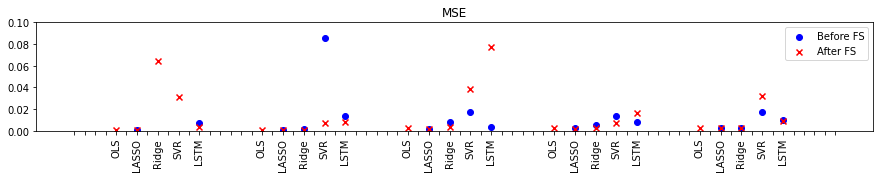

In [61]:
### FS means Feature selection
fig= plt.figure(figsize=[15,2])
plt.scatter(xl,d[0],marker='o',color='b',label='Before FS')
plt.scatter(xl,d[1],marker='x',color='r',label ='After FS')
plt.xticks(xl, xtick, rotation='vertical')
axes = plt.gca()
axes.set_ylim([0,0.1])
axes.set_xticklabels(xtick)
plt.legend()
plt.title('MSE')

In [75]:
###average mse for OLS ,LASSO,Ridge, SVR, LSTM, before FS
mse=[]
for x in MSE:
  i=0
  for t in  ['3M','2Y','5Y','10Y','30Y']:
    i+=x[0][t]
  mse.append(i)
  print(i)

238.92337183676042
0.008041515950704724
0.3497070395317145
0.3041206655155479
0.04346205294132233


In [76]:
###average mse for OLS ,LASSO,Ridge, SVR, LSTM, after FS
mseb=[]
for x in MSE:
  i=0
  for t in  ['3M','2Y','5Y','10Y','30Y']:
    i+=x[1][t]
  mseb.append(i)
  print(i)

0.009289095819348319
0.008330109370149994
0.07390446759787797
0.11616189741282576
0.11406446970067918


In [79]:
###average mse for OLS ,LASSO,Ridge, SVR, LSTM on average
for i in (np.array(mseb)+np.array(mse))/2:
  print(i)

119.46633046628989
0.00818581266042736
0.21180575356479625
0.2101412814641868
0.07876326132100075
